<a href="https://colab.research.google.com/github/sanoop-p-nambiar/machinelearning/blob/main/k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


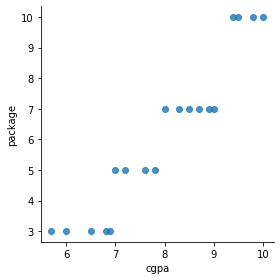

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("/content/test.csv")
sn.lmplot("cgpa", "package", data = df, fit_reg = False, size = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["cgpa", "package"]])
scaled_df[0:5]

array([[-1.81027407, -1.26434926],
       [-1.5719701 , -1.26434926],
       [-0.85705816, -1.26434926],
       [-1.1747968 , -1.26434926],
       [-0.93649282, -1.26434926]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


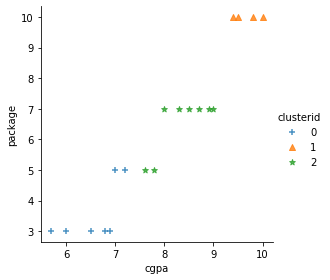

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_
markers = ['+', '^','*']
sn.lmplot("cgpa","package", data = df, hue = "clusterid", fit_reg = False, markers=markers,size = 4)

In [ ]:
clusters = KMeans(3)
clusters.fit(df)
df["new_clusterid"] = clusters.labels_
df.groupby("new_clusterid")['cgpa', 'package'].agg(["mean", 'std']).reset_index()

<ipython-input-12-54effce74c4c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("new_clusterid")['cgpa', 'package'].agg(["mean", 'std']).reset_index()


new_clusterid      cgpa              package         
                     mean       std       mean      std
0             0  8.350000  0.515475   6.500000  0.92582
1             1  6.585714  0.552052   3.571429  0.97590
2             2  9.675000  0.275379  10.000000  0.00000

Text(0, 0.5, 'Sum of Squared Error')

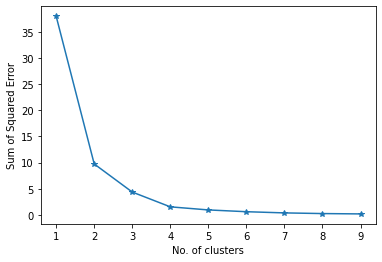

In [ ]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = "*")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Error")